# Hog

In [26]:
from skimage.feature import hog
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as Image
import cv2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [3]:
vehical = 'data/vehicles/KITTI_extracted/'
non_vehical = 'data/non-vehicles/Extras/'

In [5]:
# 1: vehical 0: non_vehical
dict_label = {}
for name in os.listdir(vehical):
    file = os.path.join(vehical, name)
    dict_label[file] = 1

for name in os.listdir(non_vehical):
    file = os.path.join(non_vehical, name)
    dict_label[file] = 0

# sample a vehical

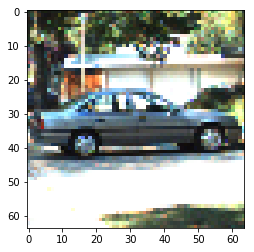

In [24]:
img_name = list(dict_label.keys())[np.random.randint(len(dict_label))]
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Different color space and parameters

In [2]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

NameError: name 'img' is not defined

In [31]:
# convert color space
HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
LUV = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

In [43]:
@interact(img_c = ['RGB', 'HSV', 'HLS', 'YUV', 'YCrCb','LUV'], orientations=(9,36,2), pix_per_cell=(2,30,1), cell_per_block=(2,10,1))
def hog_show(img_c = "RGB", orientations=9, pix_per_cell=8, cell_per_block=2):
    
    def hog_image(img):
        features, hog_image = hog(img, orientations=orientations,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")
        return hog_image
    
    img_temp = None
    if img_c == "RGB":
        img_temp = img
    elif img_c == "HSV":
        img_temp = HSV
    elif img_c == "HLS":
        img_temp = HLS
    elif img_c == "YUV":
        img_temp = YUV
    elif img_c == "LUV":
        img_temp = LUV
    elif img_c == "YCrCb":
        img_temp = YCrCb
    
    f, ax = plt.subplots(2, 3 ,figsize=(12,8))
    for c in range(3):
        ax[0,c].imshow(img_temp[:, :, c], cmap='gray')
        ax[0,c].set_title(img_c[c])
        ax[1,c].imshow(hog_image(img_temp[:, :, c]), cmap='gray')
    plt.show()